<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/Assignment_Scraper_Example_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import time

import random

user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
]

headers = {'User-Agent': random.choice(user_agents)}


In [ ]:

movie_name=[]
rating=[]
metascore=[]
votes=[]
req=0
year_list = []
# Number of pages to fetch
page_limit = 5

for years in range(2010,2012):
    url = f"https://www.imdb.com/search/title/?title_type=feature&release_date={years}-01-01,{years}-12-31"

    try:
        # Send initial request to fetch the HTML content
        response = requests.get(url, headers=headers)
        soup = bs(response.text, "html.parser")

        # Extract initial page results
        containers = soup.find_all('li', {'class': 'ipc-metadata-list-summary-item'})
        for i in containers:
            if i.select_one("span.sc-b0901df4-0.bcQdDJ.metacritic-score-box") is not None:
                mn_container = i.select_one("h3.ipc-title__text").text.split()
                movie_name.append(' '.join(mn_container[1:]))
                vr_container = i.select_one("span.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--imdb.ratingGroup--imdb-rating").text.split()
                rating.append(float(vr_container[0]))
                votes.append(re.sub("[()]", "", vr_container[1]))
                metascore.append(int(i.select_one("span.sc-b0901df4-0.bcQdDJ.metacritic-score-box").text))

                # Extracting the year from the current container
                year_element = i.find("span", class_="sc-b0691f29-8 ilsLEX dli-title-metadata-item")
                if year_element:
                    year_list.append(year_element.text.strip())
                else:
                    year_list.append(None)  # Or any default value if year is not found

        # Fetch subsequent pages
        for page in range(2, page_limit + 1):
            next_page_url = f"{url}&start={((page-1) * 50) + 1}"
            response = requests.get(next_page_url, headers=headers)
            soup = bs(response.text, "html.parser")
            containers = soup.find_all('li', {'class': 'ipc-metadata-list-summary-item'})
            for i in containers:
                if i.select_one("span.sc-b0901df4-0.bcQdDJ.metacritic-score-box") is not None:
                    mn_container = i.select_one("h3.ipc-title__text").text.split()
                    movie_name.append(' '.join(mn_container[1:]))
                    vr_container = i.select_one("span.ipc-rating-star.ipc-rating-star--base.ipc-rating-star--imdb.ratingGroup--imdb-rating").text.split()
                    rating.append(float(vr_container[0]))
                    votes.append(re.sub("[()]", "", vr_container[1]))
                    metascore.append(int(i.select_one("span.sc-b0901df4-0.bcQdDJ.metacritic-score-box").text))

                    # Extracting the year from the current container
                    year_element = i.find("span", class_="sc-b0691f29-8 ilsLEX dli-title-metadata-item")
                    if year_element:
                        year_list.append(year_element.text.strip())
                    else:
                        year_list.append(None)  # Or any default value if year is not found


        # Random sleep before the next iteration
        interval = random.uniform(8, 15)
        print("Sleeping for", interval, "seconds")
        time.sleep(interval)

    except Exception as e:
        print("An error occurred:", e)

Sleeping for 10.213440360302286 seconds
Sleeping for 14.53337247783292 seconds


In [ ]:
len(votes)

475

In [ ]:
df=pd.DataFrame(list(zip(movie_name,year_list, rating,metascore,votes)),columns=["Movie Name","Year", "Rating","Metascore","Votes"])
df

,Movie Name,Year,Rating,Metascore,Votes
0,Inception,2010,8.8,74,2.5M
1,The Last Airbender,2010,4.0,20,174K
2,Shutter Island,2010,8.2,63,1.4M
3,Incendies,2010,8.3,80,199K
4,Kick-Ass,2010,7.6,66,592K
...,...,...,...,...,...
470,Detachment,2011,7.7,52,99K
471,Bulletproof Gangster,2011,7.0,50,51K
472,Rango,2011,7.3,75,292K
473,I Am Number Four,2011,6.1,36,246K


In [ ]:
df.to_csv('movie_list.csv',index=False)

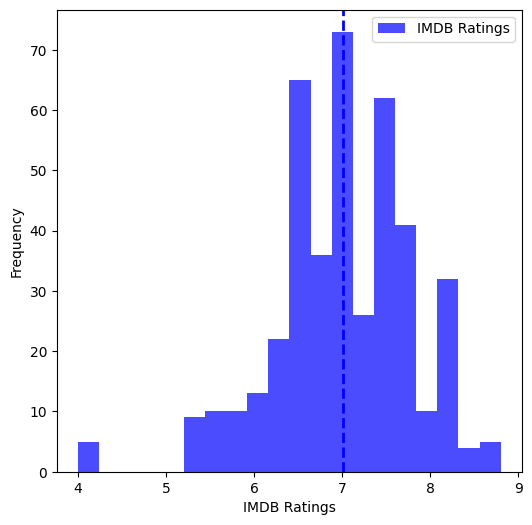

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

avg_r = np.mean(rating)
avg_m = np.mean(metascore)

plt.figure(figsize=(6, 6))  # Creating a new figure

# Plotting the histogram of IMDb ratings
plt.hist(rating, bins=20, alpha=0.7, color='blue', label='IMDB Ratings')

# Adding a dashed line for the average IMDb rating
plt.axvline(avg_r, color='blue', linestyle='dashed', linewidth=2)

# Adding labels and legend
plt.xlabel('IMDB Ratings')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()


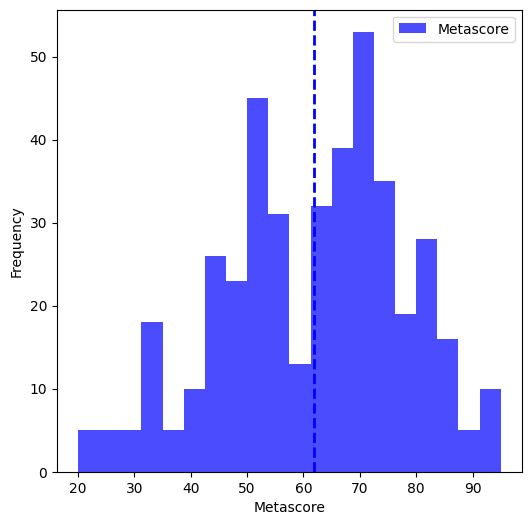

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

avg_m = np.mean(metascore)

plt.figure(figsize=(6, 6))  # Creating a new figure

# Plotting the histogram of Metascores
plt.hist(metascore, bins=20, alpha=0.7, color='blue', label='Metascore')

# Adding a dashed line for the average Metascore
plt.axvline(avg_m, color='blue', linestyle='dashed', linewidth=2)

# Adding labels and legend
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()
